<a href="https://colab.research.google.com/github/TusharC0des/Colon-Cancer-Detection/blob/main/Colon_Cancer_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os

In [ ]:
base_dir = '/content/drive/MyDrive/Colab_Notebooks/Colon/'

train_cancerous_dir = os.path.join(base_dir, 'colon_aca')
train_non_cancerous_dir = os.path.join(base_dir, 'colon_n')

print(f"Cancerous images directory: {train_cancerous_dir}")
print(f"Non-cancerous images directory: {train_non_cancerous_dir}")

Cancerous images directory: /content/drive/MyDrive/Colab_Notebooks/Colon/colon_aca
Non-cancerous images directory: /content/drive/MyDrive/Colab_Notebooks/Colon/colon_n


In [ ]:
image_size = (150, 150)
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,  # Rescale pixel values to between 0 and 1
    validation_split=0.2  # Split 20% for validation
)

image_size = (224, 224)
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=image_size,  # Resize images
    batch_size=batch_size,
    class_mode='binary',  # Binary classification (Cancerous vs. Non-Cancerous)
    subset='training'

validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

Found 1600 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [ ]:
model = tf.keras.Sequential([
    # First convolutional layer with max pooling
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    # Second convolutional layer with max pooling
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    # Third convolutional layer with max pooling
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    # Flatten and add fully connected layers
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),

    # Output layer
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Data generator for training images
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,  # Random rotation
    width_shift_range=0.2,  # Random width shift
    height_shift_range=0.2,  # Random height shift


    shear_range=0.2,  # Random shear
    zoom_range=0.2,  # Random zoom
    horizontal_flip=True,  # Random horizontal flip
    fill_mode='nearest',  # Fill in any gaps in the image
    validation_split=0.2  # 20% of data for validation
)

# Data generator for validation (no augmentation needed for validation data)
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)
# Update the target_size to match the MobileNetV2 input shape
image_size = (224, 224)
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=image_size, # Updated target_size
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

validation_generator = validation_datagen.flow_from_directory(
    base_dir,
    target_size=image_size, # Updated target_size
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)
# ... (rest of the code)

Found 1600 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [ ]:
model = tf.keras.Sequential([
    # First convolutional layer with max pooling
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)), # Updated input_shape
    tf.keras.layers.MaxPooling2D(2, 2),

    # Second convolutional layer with max pooling
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    # Third convolutional layer with max pooling
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    # Flatten and add fully connected layers
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),

    # Dropout to prevent overfitting
    tf.keras.layers.Dropout(0.5),  # Dropout rate is 50%

    # Output layer (binary classification)
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Early stopping callback to monitor validation loss
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor the validation loss
    patience=5,  # Wait for 5 epochs with no improvement before stopping
    restore_best_weights=True  # Restore weights from the best epoch
)

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    callbacks=[early_stopping]  # Pass the early stopping callback
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 345s 7s/step - accuracy: 0.4780 - loss: 1.3342 - val_accuracy: 0.4948 - val_loss: 0.6861
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 303s 5s/step - accuracy: 0.5060 - loss: 0.6938 - val_accuracy: 0.6484 - val_loss: 0.6806
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 261s 5s/step - accuracy: 0.5901 - loss: 0.6727 - val_accuracy: 0.6354 - val_loss: 0.6904
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 262s 5s/step - accuracy: 0.6462 - loss: 0.6501 - val_accuracy: 0.5938 - val_loss: 0.6480
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 260s 5s/step - accuracy: 0.5923 - loss: 0.6851 - val_accuracy: 0.6354 - val_loss: 0.6526
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 262s 5s/step - accuracy: 0.6564 - loss: 0.6305 - val_accuracy: 0.5833 - val_loss: 0.5932
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 322s 6s/step - accuracy: 0.6310 - loss: 0.6246 - val_accuracy: 0.7839 - val_loss: 0.4612
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 262s 5s/step - accuracy: 0.7589 - loss: 0.5072 - val_accuracy: 0.7917 - v

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam

# Load MobileNetV2 base
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze base model

# Add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)

# Final model
model = Model(inputs=base_model.input, outputs=output)

# Compile
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_2[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,586,177 (9.87 MB)

 Trainable params: 328,193 (1.25 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

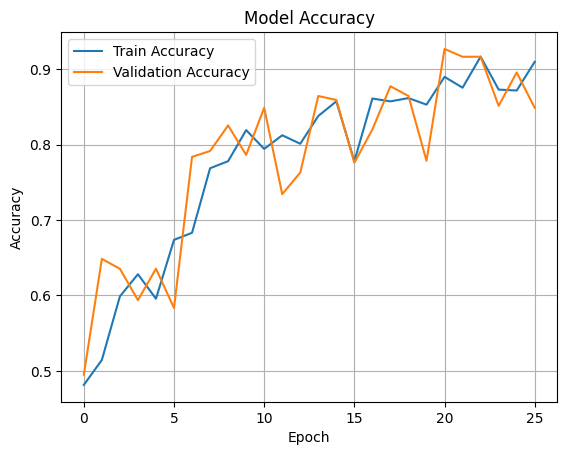

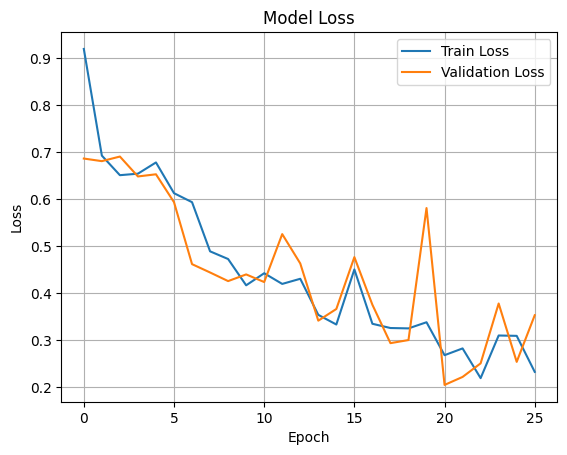

In [ ]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Predict labels
Y_pred = model.predict(validation_generator)
y_pred = (Y_pred > 0.5).astype(int)

# True labels
y_true = validation_generator.classes

# Report
print("Classification Report:")
print(classification_report(y_true, y_pred))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)


13/13 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step
Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.80      0.62       200
           1       0.54      0.23      0.33       200

    accuracy                           0.52       400
   macro avg       0.53      0.52      0.48       400
weighted avg       0.53      0.52      0.48       400

Confusion Matrix:
[[160  40]
 [153  47]]


In [ ]:
# Unfreeze top layers for fine-tuning
base_model.trainable = True
for layer in base_model.layers[:-30]:
    layer.trainable = False

# Recompile with lower learning rate
model.compile(optimizer=Adam(learning_rate=1e-5),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Assuming 'reduce_lr' is defined elsewhere,
# if not, you'll need to define it similarly to 'early_stopping'
from tensorflow.keras.callbacks import ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)

# Continue training, using 'early_stopping' instead of 'early_stop'
history_fine = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=20,
    callbacks=[early_stopping, reduce_lr]  # Changed 'early_stop' to 'early_stopping'
)

Epoch 1/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 157s 3s/step - accuracy: 0.5803 - loss: 0.6795 - val_accuracy: 0.8425 - val_loss: 0.4752 - learning_rate: 1.0000e-05
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 140s 3s/step - accuracy: 0.8452 - loss: 0.4095 - val_accuracy: 0.9375 - val_loss: 0.3015 - learning_rate: 1.0000e-05
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 142s 3s/step - accuracy: 0.9047 - loss: 0.2926 - val_accuracy: 0.9525 - val_loss: 0.1985 - learning_rate: 1.0000e-05
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 140s 3s/step - accuracy: 0.9413 - loss: 0.2134 - val_accuracy: 0.9775 - val_loss: 0.1329 - learning_rate: 1.0000e-05
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 143s 3s/step - accuracy: 0.9537 - loss: 0.1549 - val_accuracy: 0.9750 - val_loss: 0.0975 - learning_rate: 1.0000e-05
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 141s 3s/step - accuracy: 0.9603 - loss: 0.1366 - val_accuracy: 0.9800 - val_loss: 0.0737 - learning_rate: 1.0000e-05
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 142s 3s/step - accuracy: 0.9736 

In [ ]:
model.save('/content/drive/MyDrive/Colab_Notebooks/Colon/final_colon_cancer_model1.h5')

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = "/content/drive/MyDrive/Colab_Notebooks/Colon/colon_n/colonn1.jpeg"
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0

prediction = model.predict(img_array)

if prediction[0][0] < 0.5:
    print("Prediction: Cancerous")
else:
    print("Prediction: Non-Cancerous")


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Prediction: Non-Cancerous


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = "/content/drive/MyDrive/Colab_Notebooks/Colon/colon_aca/colonca1.jpeg"  # change path
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0

prediction = model.predict(img_array)

if prediction[0][0] < 0.5:
    print("Prediction: Cancerous")
else:
    print("Prediction: Non-Cancerous")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Prediction: Cancerous
